## The Sparks Foundation - Data Science & Buisness Analytics Internship

### Task-1: Prediction using supervised Machine Learning
- In this task we required to predict percentage of the student on the basis of   number of hours studied using Linear Regression supervised machine learning
  algorithm.
### Author: Geetanjali Kotkar

### Step 1: Importing the dataset

In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data from url

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# To check rows & columns in data
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# To check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Step 2: Visualizing the data

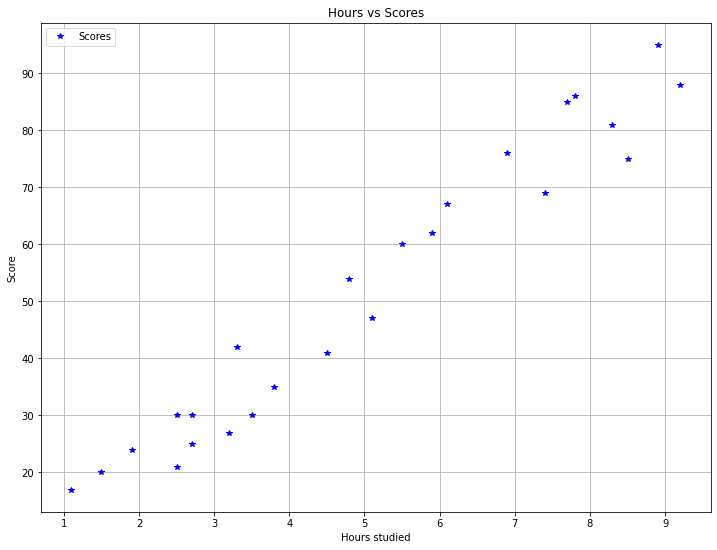

In [58]:
df.plot(x="Hours",y="Scores",style="*",color="blue")
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.grid()

#### From the above graph we observe that there is a linear relationship between hours studied & scores. So we use linear regression.

In [16]:
# To check correlation between variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3: Data Preparation

In [17]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
# Use iloc function to divide the data
x=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [26]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Step 4: Training the Algorithm

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Step 5: Visualizing the model

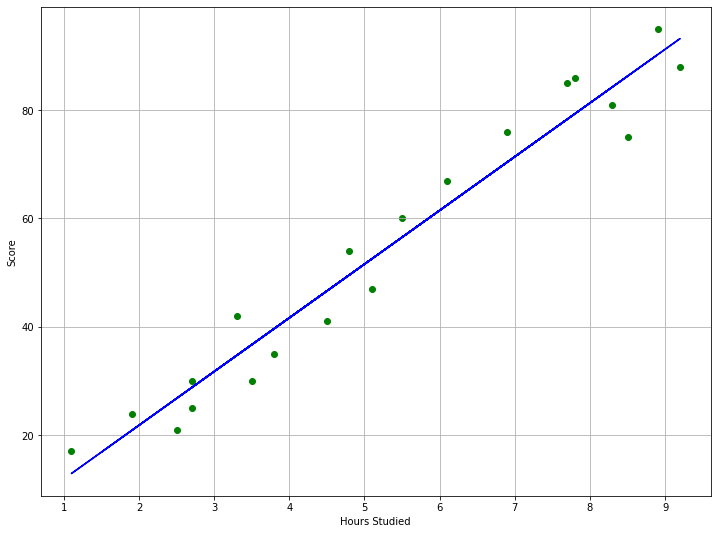

In [40]:
line= model.coef_*x + model.intercept_

#plotting for the training data
plt.scatter(x_train,y_train,color="green")
plt.plot(x,line,color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid()           


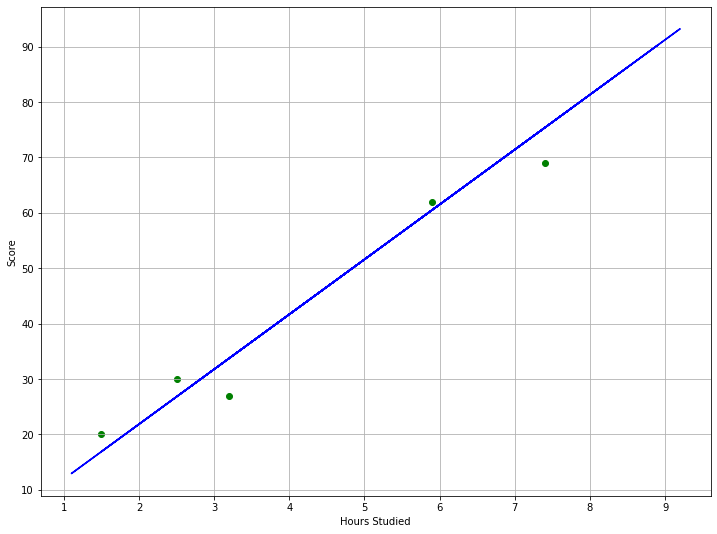

In [39]:
#plotting for the testing data
plt.scatter(x_test,y_test,color="green")
plt.plot(x,line,color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid()           


###  Step 6: Making Predictions

In [47]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [48]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [49]:
y_pred=model.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [50]:
# Compare Actual vs Predicted
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [55]:
# Testing the model

hours=9.14
own_pred=model.predict([[hours]])
print('The predicted score if a person studies for',hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.14 hours is [92.60156027]


### Step 7: Evaluating the Model

In [56]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


### Thank you!